In [1]:
from trajectory import buildTrajectory
import partitura
import numpy as np
import itertools

In [2]:
part = partitura.load_musicxml("score_test.musicxml")

note_array = part.note_array
print(note_array.dtype)
notes = [(n[0], n[2]) for n in note_array]


chords = [list(item[1]) for item in itertools.groupby(sorted(notes), key=lambda x: x[0])]
chords = [list(zip(*c))[1] for c in chords]

ignoring direction type: metronome {'parentheses': 'no', 'default-x': '-43.08', 'relative-y': '20.00'}


[('onset', '<f4'), ('duration', '<f4'), ('pitch', '<i4'), ('voice', '<i4'), ('id', '<U256')]


In [3]:
Tonnetz = [3, 4, 5]
# chords = [[48, 55, 60, 64, 67, 72], [60, 65, 69], [62, 65, 69, 72], [60, 64, 67], [60, 62, 67], [62, 67, 71, 77], [60, 64, 67, 72, 76, 84]]
trajectory = buildTrajectory(chords, Tonnetz)




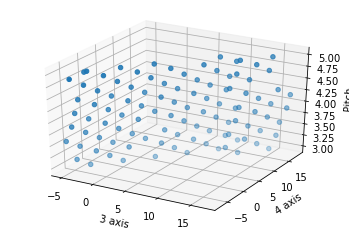

In [4]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from  trajectory import SetOfPoints

ps, pms = SetOfPoints(trajectory)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ys, zs = zip(*ps)

ax.scatter(xs, ys, zs, marker='o')

ax.set_xlabel('3 axis')
ax.set_ylabel('4 axis')
ax.set_zlabel('Pitch')

plt.show()

### Create Edges

In [5]:
def trajectory_edges(trajectory):
    TotalEdges = []
    dist = [-1, 0, 1]
    for dicts in trajectory.chordPositions :
        couples = list(itertools.combinations(dicts.values(), 2))
        for couple in couples:
            (x1, y1, z1), (x2, y2, z2) = couple
            if (x1 - x2) in dist and (y1 - y2) in dist:
                    if not (((x1 - x2) == 1 and (y1 - y2) == -1) or
                            ((x1 - x2) == -1 and (y1 - y2) == 1)):
                        TotalEdges.append(couple)
    return TotalEdges

In [6]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib notebook

import numpy as np
import pylab as plt
from matplotlib import collections  as mc

def plot_trajectory(TrajectoryEdges, TrajectoryPoints, Tonnetz):
    fig = plt.figure()
    ax  = fig.add_subplot(111, projection = '3d')
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.zaxis.set_major_locator(MultipleLocator(1))
    
    x, y, z = zip(*TrajectoryPoints)
    
    
    for el in TrajectoryEdges:
        line = []
        line = mc.LineCollection(el, linewidths=1)
        ax.add_collection(line)
        ax.autoscale()
        ax.margins(1)
    
    plt.scatter(x, y, z, marker='o')
    plt.title(Tonnetz)
    plt.grid(True)
    plt.axis('equal')


    plt.show()

### Graph from Adjacency Matrix

In [7]:
from  trajectory import weightsOfTrajPoints_Normalized

def trajectory_to_adjacency(trajectory):
    ps, pms = SetOfPoints(trajectory)
    edges = trajectory_edges(trajectory)
    edges += trajectory.connectingEdges
    weights = weightsOfTrajPoints_Normalized(ps, pms)
    dim = len(ps)
    adjacency = np.zeros((dim, dim))
    for i in range(dim):  
        for j in range(dim):
            if (ps[i], ps[j]) in edges:
                adjacency[i][j] += (weights[ps[i]] + weights[ps[j]])/2
    return adjacency
    


In [8]:
adjacency = trajectory_to_adjacency(trajectory)

print(adjacency)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01226994 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<IPython.core.display.Javascript object>


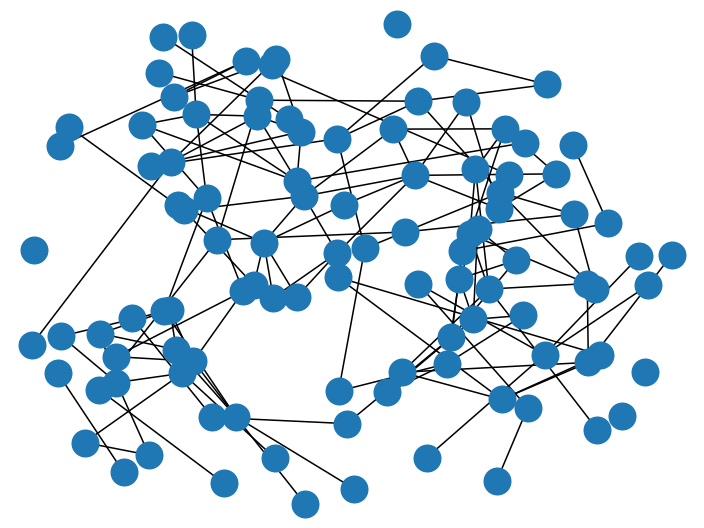

In [9]:
import networkx as nx

graph = nx.from_numpy_array(adjacency, parallel_edges=False, create_using=None)
nx.draw(graph)

In [10]:
print(trajectory.connectingEdges)

[((0, 0, 3.0), (0, 0, 4.0)), [], [], ((0, -1, 3.75), (0, -1, 3.75)), ((-1, -2, 3.17), (-1, -2, 4.17)), ((-2, -3, 3.58), (-2, -3, 3.58)), ((-2, -3, 3.58), (-2, -3, 3.58)), [], [], [], [], ((-3, -4, 5.0), (-3, -4, 5.0)), [], [], [], [], ((-3, -4, 4.0), (-3, -4, 5.0)), [], ((-4, -6, 3.17), (-4, -6, 4.17)), [], [], [], ((-4, -6, 4.17), (-4, -6, 4.17)), [], ((-3, -4, 4.0), (-3, -4, 4.0)), ((-3, -4, 4.0), (-3, -4, 4.0)), [], [], ((-3, -5, 4.75), (-3, -5, 3.75)), [], ((-4, -5, 4.42), (-4, -5, 4.42)), [], [], ((-2, -3, 4.58), (-2, -3, 4.58)), ((-3, -4, 4.0), (-3, -4, 3.0)), ((-4, -5, 4.42), (-4, -5, 4.42)), ((-4, -5, 4.42), (-4, -5, 3.42)), [], [], ((-4, -5, 4.42), (-4, -5, 3.42)), ((-3, -4, 5.0), (-3, -4, 4.0)), [], [], ((1, 0, 3.33), (1, 0, 4.33)), ((0, 0, 3.0), (0, 0, 3.0)), ((0, 0, 3.0), (0, 0, 4.0)), ((0, 0, 4.0), (0, 0, 3.0)), [], ((2, 1, 3.92), (2, 1, 4.92)), [], [], [], ((3, 4, 5.0), (3, 4, 4.0)), [], [], [], [], [], [], ((3, 4, 4.0), (3, 4, 4.0)), [], [], [], [], [], ((6, 8, 3.0), (6,